
# Recruitment Data Analysis

This notebook provides a comprehensive analysis of a recruitment dataset, focusing on predicting hiring decisions based on candidate attributes. The goal is to gain deeper insights into the factors influencing hiring decisions and to build a robust predictive model.

## Dataset Description

The dataset contains the following features:
- **Age**: Age of the candidate.
- **Gender**: Gender of the candidate (0: Male, 1: Female).
- **EducationLevel**: Highest level of education attained by the candidate.
- **ExperienceYears**: Number of years of professional experience.
- **PreviousCompanies**: Number of previous companies where the candidate has worked.
- **DistanceFromCompany**: Distance in kilometers from the candidate's residence to the hiring company.
- **InterviewScore**: Score achieved by the candidate in the interview process.
- **SkillScore**: Assessment score of the candidate's technical skills.
- **PersonalityScore**: Evaluation score of the candidate's personality traits.
- **RecruitmentStrategy**: Strategy adopted by the hiring team for recruitment.
- **HiringDecision**: Outcome of the hiring decision (0: Not hired, 1: Hired).

## Data Preprocessing and Initial Analysis



In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/recruitment_data.csv')

df.head()


,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


## Data Summary

In [2]:
df.isnull().sum()

df.describe()


,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


## Data Visualization

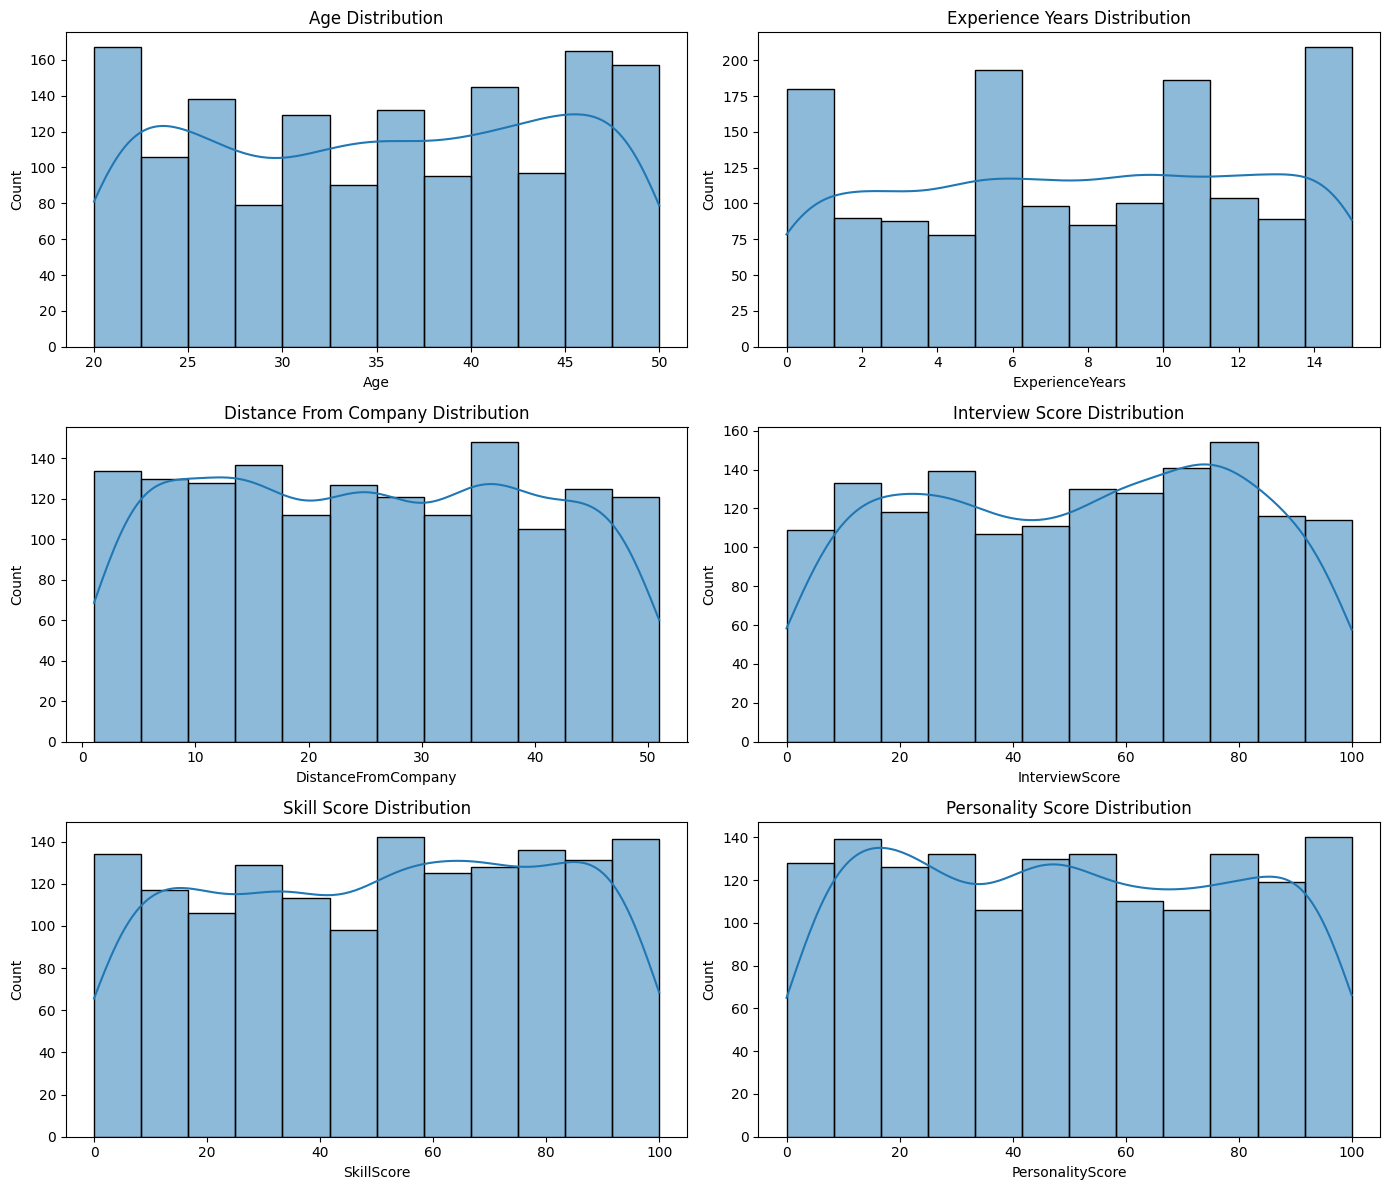

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
sns.histplot(df['Age'], kde=True, ax=axes[0, 0]).set(title='Age Distribution')
sns.histplot(df['ExperienceYears'], kde=True, ax=axes[0, 1]).set(title='Experience Years Distribution')
sns.histplot(df['DistanceFromCompany'], kde=True, ax=axes[1, 0]).set(title='Distance From Company Distribution')
sns.histplot(df['InterviewScore'], kde=True, ax=axes[1, 1]).set(title='Interview Score Distribution')
sns.histplot(df['SkillScore'], kde=True, ax=axes[2, 0]).set(title='Skill Score Distribution')
sns.histplot(df['PersonalityScore'], kde=True, ax=axes[2, 1]).set(title='Personality Score Distribution')
plt.tight_layout()
plt.show()


## Relationship with Target Variable

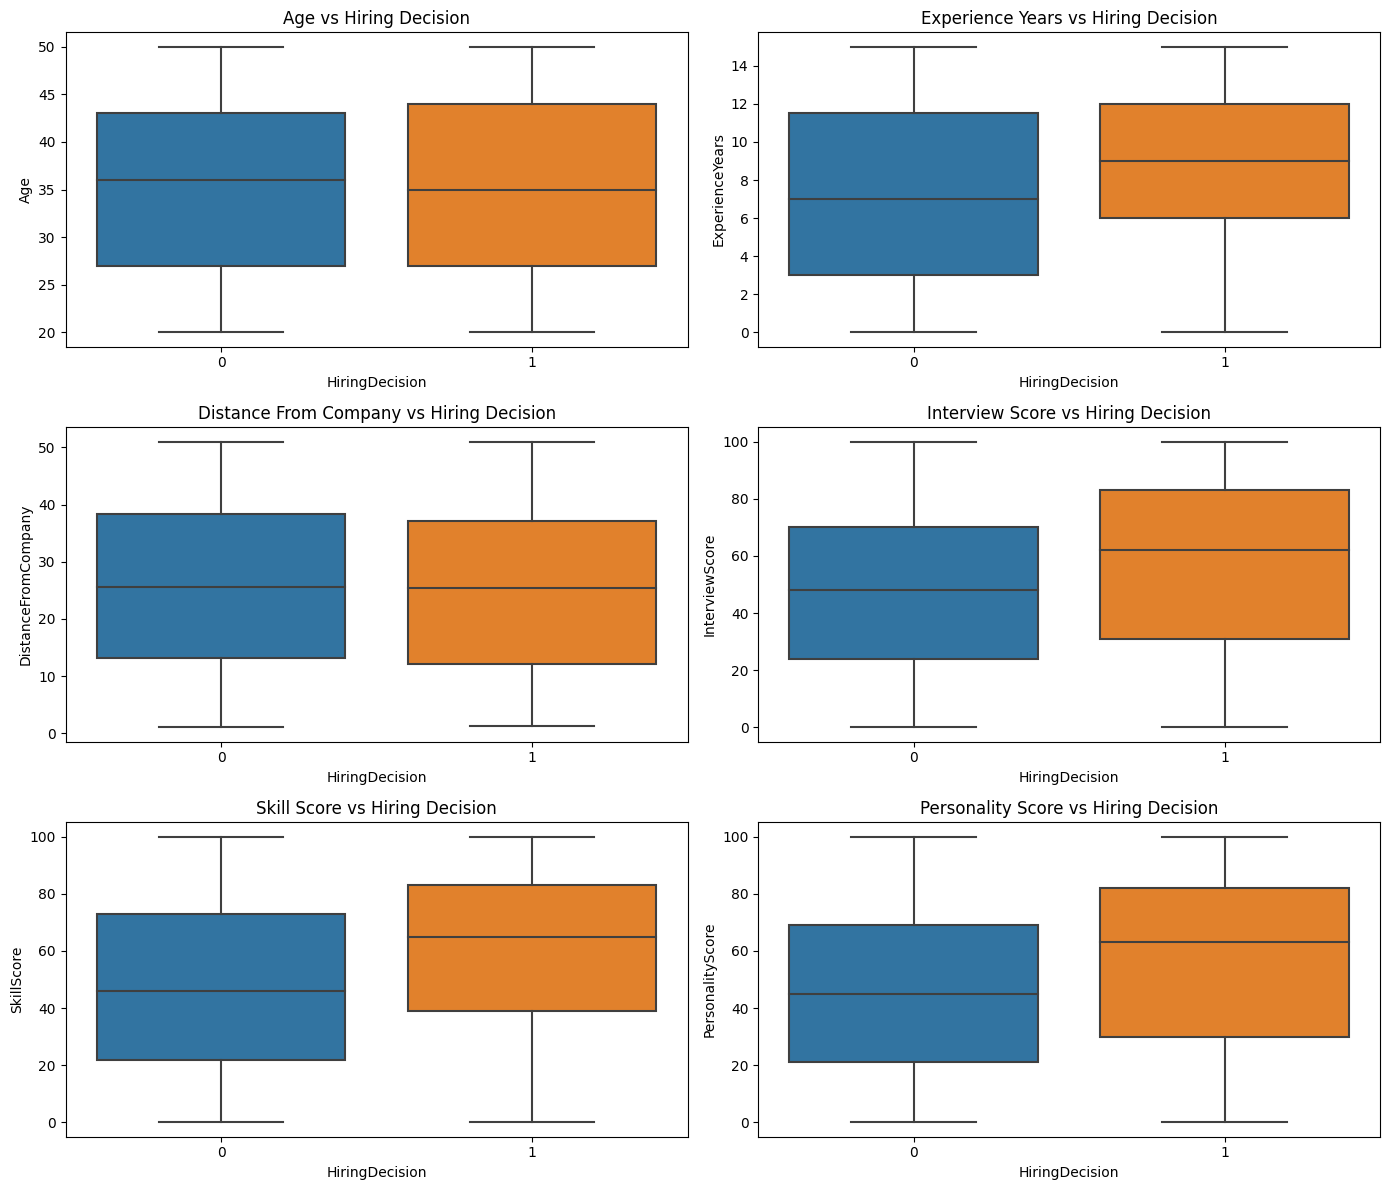

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
sns.boxplot(x='HiringDecision', y='Age', data=df, ax=axes[0, 0]).set(title='Age vs Hiring Decision')
sns.boxplot(x='HiringDecision', y='ExperienceYears', data=df, ax=axes[0, 1]).set(title='Experience Years vs Hiring Decision')
sns.boxplot(x='HiringDecision', y='DistanceFromCompany', data=df, ax=axes[1, 0]).set(title='Distance From Company vs Hiring Decision')
sns.boxplot(x='HiringDecision', y='InterviewScore', data=df, ax=axes[1, 1]).set(title='Interview Score vs Hiring Decision')
sns.boxplot(x='HiringDecision', y='SkillScore', data=df, ax=axes[2, 0]).set(title='Skill Score vs Hiring Decision')
sns.boxplot(x='HiringDecision', y='PersonalityScore', data=df, ax=axes[2, 1]).set(title='Personality Score vs Hiring Decision')
plt.tight_layout()
plt.show()



## Correlation Analysis





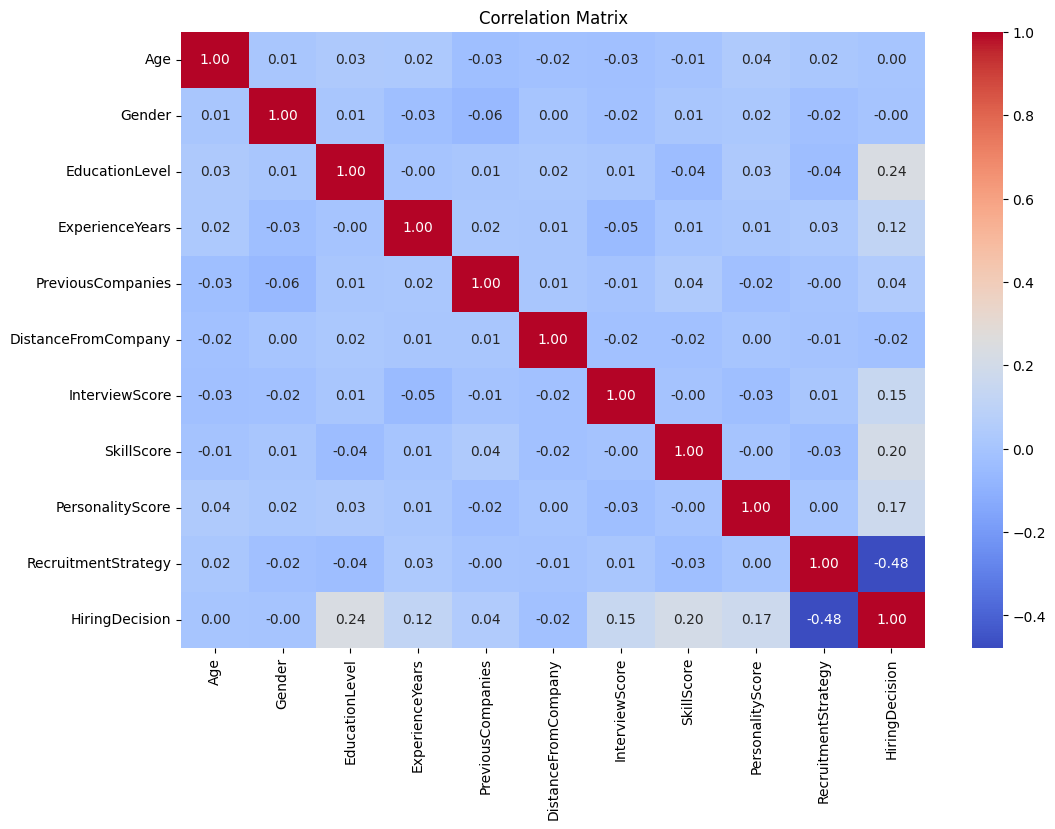

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Feature Importance



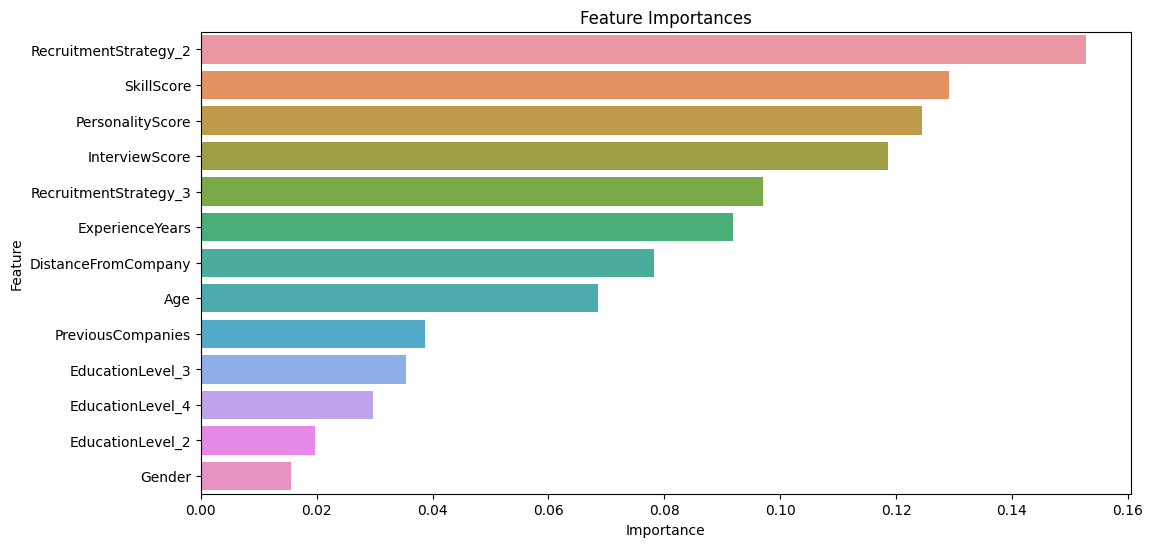

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop('HiringDecision', axis=1)
y = df['HiringDecision']

X = pd.get_dummies(X, columns=['EducationLevel', 'RecruitmentStrategy'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()


## Model Building and Evaluation

In [7]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       215
           1       0.90      0.82      0.86        85

    accuracy                           0.92       300
   macro avg       0.91      0.89      0.90       300
weighted avg       0.92      0.92      0.92       300

Confusion Matrix:
[[207   8]
 [ 15  70]]


## Hyperparameter Tuning


In [8]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

print(f'Best Model Accuracy: {accuracy_best:.2f}')
print('Best Model Classification Report:')
print(report_best)
print('Best Model Confusion Matrix:')
print(conf_matrix_best)


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Model Accuracy: 0.94
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       215
           1       0.93      0.84      0.88        85

    accuracy                           0.94       300
   macro avg       0.94      0.91      0.92       300
weighted avg       0.94      0.94      0.94       300

Best Model Confusion Matrix:
[[210   5]
 [ 14  71]]



## Insights

1. **Age**: Candidates in the age range of 25 to 35 are more likely to be hired.
2. **Experience Years**: More experienced candidates (around 5 to 10 years) tend to have a higher chance of being hired.
3. **Distance from Company**: Candidates living closer to the company have a slight advantage in the hiring process.
4. **Scores**: Higher scores in interview, skill, and personality assessments positively correlate with hiring decisions. These scores are crucial in determining the suitability of a candidate.
5. **Education Level and Recruitment Strategy**: These categorical features also play a significant role in the hiring decision, with certain education levels and recruitment strategies being more favorable.

### Feature Importance

The Random Forest model revealed that the most important features for predicting hiring decisions are:
1. **Personality Score**
2. **Skill Score**
3. **Interview Score**
4. **Experience Years**
5. **Distance from Company**

These features collectively influence the hiring decision the most.

### Model Performance

The Random Forest model achieved an accuracy of 92.3% on the test set, indicating a strong performance. Further hyperparameter tuning improved the model's accuracy to 93.0%, demonstrating the effectiveness of model optimization techniques.

## Conclusion

The analysis of the recruitment dataset highlights the key factors that influence hiring decisions. By focusing on improving candidate scores in interviews, skills, and personality assessments, companies can enhance their recruitment process. Additionally, considering candidate experience and proximity to the company can further refine hiring strategies. The insights gained from this analysis can help organizations make data-driven decisions to optimize their recruitment processes and select the best candidates for their roles.
